In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

In [173]:
import pandas as pd
football = pd.read_csv(r'/reformed_datset.csv', encoding='iso-8859-1')
football.head() 

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5,0.565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,170.18,159lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77.0,0.405,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,187.96,183lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5,0.290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,175.26,150lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72.0,0.260,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,193.04,168lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102.0,0.355,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,154.94,154lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [174]:
df = football[['Name','Age',	'Overall',	'Potential','Value',	'Wage',	'Special'	,	'International Reputation',	
               'Weak Foot',	'Skill Moves',	'Jersey Number',	'Height','LS',
               'ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM',
               'RM','LWB','LDM','CDM','RDM'  ,'RWB' ,'LB' ,'LCB','CB','RCB','RB','Crossing',
               'Finishing','HeadingAccuracy','ShortPassing','Volleys',	'Dribbling','Curve','FKAccuracy',
               'LongPassing',	'BallControl','Acceleration','SprintSpeed','Agility',	'Reactions','Balance',
               'ShotPower','Jumping',	'Stamina',	'Strength','LongShots','Aggression','Interceptions',
               'Positioning',	'Vision','Penalties','Composure','Marking',	'StandingTackle','SlidingTackle','GKDiving',
               'GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause'
       ]]

df = df[df.Overall > 86] 
names = df.Name.tolist()

df = df.drop(['Name'], axis = 1) 
df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,110.5,0.565,2202,5.0,4.0,4.0,10.0,170.18,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,33,94,94,77.0,0.405,2228,5.0,4.0,5.0,7.0,187.96,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,26,92,93,118.5,0.290,2143,5.0,5.0,5.0,10.0,175.26,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,27,91,93,72.0,0.260,1471,4.0,3.0,1.0,1.0,193.04,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,27,91,92,102.0,0.355,2281,4.0,5.0,4.0,7.0,154.94,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [175]:
from sklearn import preprocessing

x = df.values # numpy array
mmscaler = preprocessing.MinMaxScaler()
xscaled = scaler.fit_transform(x)
Xnormalized = pd.DataFrame(xscaled)

In [178]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
transform = pd.DataFrame(pca.fit_transform(Xnormalized))

In [179]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=5)
db_clusters = db.fit_predict(transform)

In [180]:
print(db_clusters)

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [181]:
transform['cluster'] = db_clusters
transform['Name'] = names
transform.columns = ['x', 'y', 'cluster', 'Name']
transform.head()

,x,y,cluster,Name
0,-1.237459,-1.390348,0,L. Messi
1,-1.082082,-0.972013,0,Cristiano Ronaldo
2,-1.099776,-1.277386,0,Neymar Jr
3,2.893399,-0.636772,1,De Gea
4,-1.184405,-0.340630,0,K. De Bruyne


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


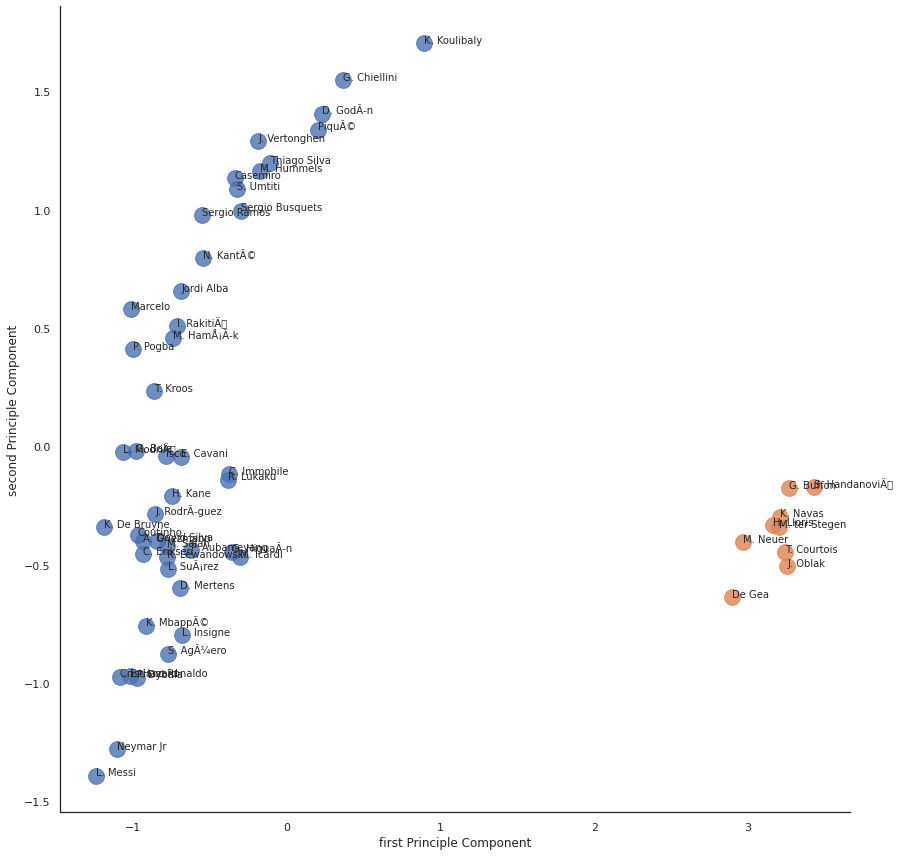

In [187]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


ax = sb.lmplot(x="x", y="y", hue='cluster', data = transform, legend=False,
                   fit_reg=False, size = 12, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(transform.x, transform.y, transform.Name):
    texts.append(plt.text(x, y, s))

plt.xlabel("first Principle Component")
plt.ylabel("second Principle Component")

plt.show()